## Imports

In [38]:
import QuantumToolbox as qt
using Logging
import CairoMakie as cm
using MiniLoggers
using ProgressMeter
using LoggingExtras
using Revise
using Dates
using YAXArrays

import LsqFit as LF


In [39]:
import SuperconductingCavities as SC

## Logger Setups

In [40]:
# MiniLogger(minlevel = MiniLoggers.Info) |> global_logger
InfoLogger = MiniLogger(minlevel = MiniLoggers.Info)
ProgressLogger = MiniLogger(minlevel = LogLevel(-1))
DebugLogger = MiniLogger(minlevel = MiniLoggers.Debug)

global_logger(InfoLogger)

Base.CoreLogging.SimpleLogger(VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}(IOContext(Base.PipeEndpoint(RawFD(21) open, 0 bytes waiting)), VSCodeServer.io_send_callback), Info, Dict{Any, Int64}())

# Mode 3

In [41]:
Mode3 = SC.Circuits.Transmon_Resonators.load("ModelSaves/Mode3/Mode3.json");

In [42]:
Mode3.params

Dict{Any, Any} with 15 entries:
  "Nrs"          => Any[10]
  "E_C"          => 0.102833
  "Cavity_Names" => Any["Mode 3"]
  "E_J"          => 26.9698
  "Nt_cut"       => 60
  "E_oscs"       => 6.22809
  "Nt"           => 10
  "ModelType"    => "TransmonResonators"
  "ng"           => 0
  "kappa_tc"     => 1.78571e-5
  "kappa_td"     => 1.2348e-5
  "kappa_cc"     => 1.0e-6
  "Model_Name"   => "Mode3"
  "gs"           => 0.0261844
  "Save_Path"    => "ModelSaves/Mode3/"

### Calibrating no ramp

In [405]:
state1 = (2,0)
state2 = (0,1)

ψ1 = Mode3.dressed_states[state1]
ψ2 = Mode3.dressed_states[state2]

ν = Mode3.Stuff["op_drive_params"]["sb_f0g1"]["freq_d"]
stark_shift = Mode3.Stuff["op_drive_params"]["sb_f0g1"]["shift"]

ε = 0.78

t_range = [150, 200]
envelope = "Square"
envelope_args = Dict{Any, Any}()


SC.Dynamics.OptimizePulse(Mode3, ψ1, ψ2, ε, freq_d, stark_shift, t_range, envelope, envelope_args, levels = 5, samples_per_level = 50)

[2024-10-10 14:51:35] Info: On Level 1
[2024-10-10 14:51:35] Info: On Step 1: t = 150.0
[2024-10-10 14:51:35] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-10-10 14:51:38] Info: Time Evolution Complete
[2024-10-10 14:51:38] Info: Done with Level_1_step_1
[2024-10-10 14:51:38] Info: Accurace: 0.4416146395276059
[2024-10-10 14:51:38] Info: ------------------------------------------------------------------------------
[2024-10-10 14:51:38] Info: On Step 2: t = 151.0204081632653
[2024-10-10 14:51:38] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-10-10 14:51:42] Info: Time Evolution Complete
[2024-10-10 14:51:42] Info: Done with Level_1_step_2
[2024-10-10 14:51:42] Info: Accurace: 0.48498343380513415
[2024-10-10 14:51:42] Info: ------------------------------------------------------------------------------
[2024-10-10 14:5

InterruptException: InterruptException:

## Error Budget Plot (Bare Loss Ops)

### Loading Data

In [415]:
push!(collect(keys(Mode3.CandD_Ops)), "Bare Mode 3 Collapse_Bare Transmon Collapse_Bare Transmon Dephasing")

3-element Vector{Any}:
 "Bare Transmon Collapse"
 "Bare Mode 3 Collapse"
 "Bare Transmon Dephasing"

In [417]:
init_states = ["g0"]#, "e0", "g0_p_e0", "g0_m_e0", "g0_p_ie0", "g0_m_ie0"]
losses = push!(collect(keys(Mode3.CandD_Ops)), "Bare Mode 3 Collapse_Bare Transmon Collapse_Bare Transmon Dephasing")
losses = push!(losses, "")

itert = Iterators.product(init_states, losses)

Mode3ErrorBudgetBare = Dict{Any, Any}()

order = ["Step_1", "Step_2", "Step_3", "Step_4", "Step_5", "Step_6", "Step_7", "Step_8", "Step_9", "Step_10", "Step_11", "Step_12", "Step_13", "Step_14", "Step_15", "Step_16", "Step_17", "Step_18"]

the_path = "Data/Binomial_Encoding_Thu-Oct-10-24:1:26/data/"

for combo in itert
    file_name = the_path*combo[1]*"_"*combo[2]*".nc"
    if combo[2] == ""
        file_name = the_path*combo[1]*".nc"
    end
    @info file_name
    Mode3ErrorBudgetBare[combo] = SC.Utils.LoadRunResults(file_name, cube_order = order, h_dims = [10,10])
end


[2024-10-10 15:09:52] Info: Data/Binomial_Encoding_Thu-Oct-10-24:1:26/data/g0_Bare Transmon Collapse.nc


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


[2024-10-10 15:09:56] Info: Data/Binomial_Encoding_Thu-Oct-10-24:1:26/data/g0_Bare Mode 3 Collapse.nc


Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


[2024-10-10 15:10:00] Info: Data/Binomial_Encoding_Thu-Oct-10-24:1:26/data/g0_Bare Transmon Dephasing.nc


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


[2024-10-10 15:10:04] Info: Data/Binomial_Encoding_Thu-Oct-10-24:1:26/data/g0_Bare Mode 3 Collapse_Bare Transmon Collapse_Bare Transmon Dephasing.nc


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


[2024-10-10 15:10:08] Info: Data/Binomial_Encoding_Thu-Oct-10-24:1:26/data/g0.nc


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


In [418]:
state_dict = Dict{Any, Any}()
for state in collect(Iterators.product([0,1,2], [0,1,2,3,4]))
    state_dict[state] = Mode3.dressed_states[state]
end

Projection_Ops = SC.Utils.Get_Projection_Ops(state_dict)

Probabilities = Dict{Any, Any}()
for key in keys(Mode3ErrorBudgetBare)
    @info "On $key"
    Probabilities[key] = SC.Utils.Get_EVs(Mode3ErrorBudgetBare[key]["states"], Projection_Ops)
end

[2024-10-10 15:10:56] Info: On ("g0", "Bare Transmon Dephasing")
[2024-10-10 15:10:59] Info: On ("g0", "Bare Mode 3 Collapse_Bare Transmon Collapse_Bare Transmon Dephasing")
[2024-10-10 15:11:02] Info: On ("g0", "")
[2024-10-10 15:11:04] Info: On ("g0", "Bare Transmon Collapse")
[2024-10-10 15:11:06] Info: On ("g0", "Bare Mode 3 Collapse")


In [421]:
Probabilities[("g0", "Bare Mode 3 Collapse_Bare Transmon Collapse_Bare Transmon Dephasing")][(0,2)][end]

0.8604875669790458 - 1.3212468766741428e-15im

### Plotting All State Evolutions

[2024-10-10 15:11:13] Info: Making Plot
[2024-10-10 15:11:19] Info: Making Plot
[2024-10-10 15:11:20] Info: Making Plot
[2024-10-10 15:11:22] Info: Making Plot
[2024-10-10 15:11:23] Info: Making Plot


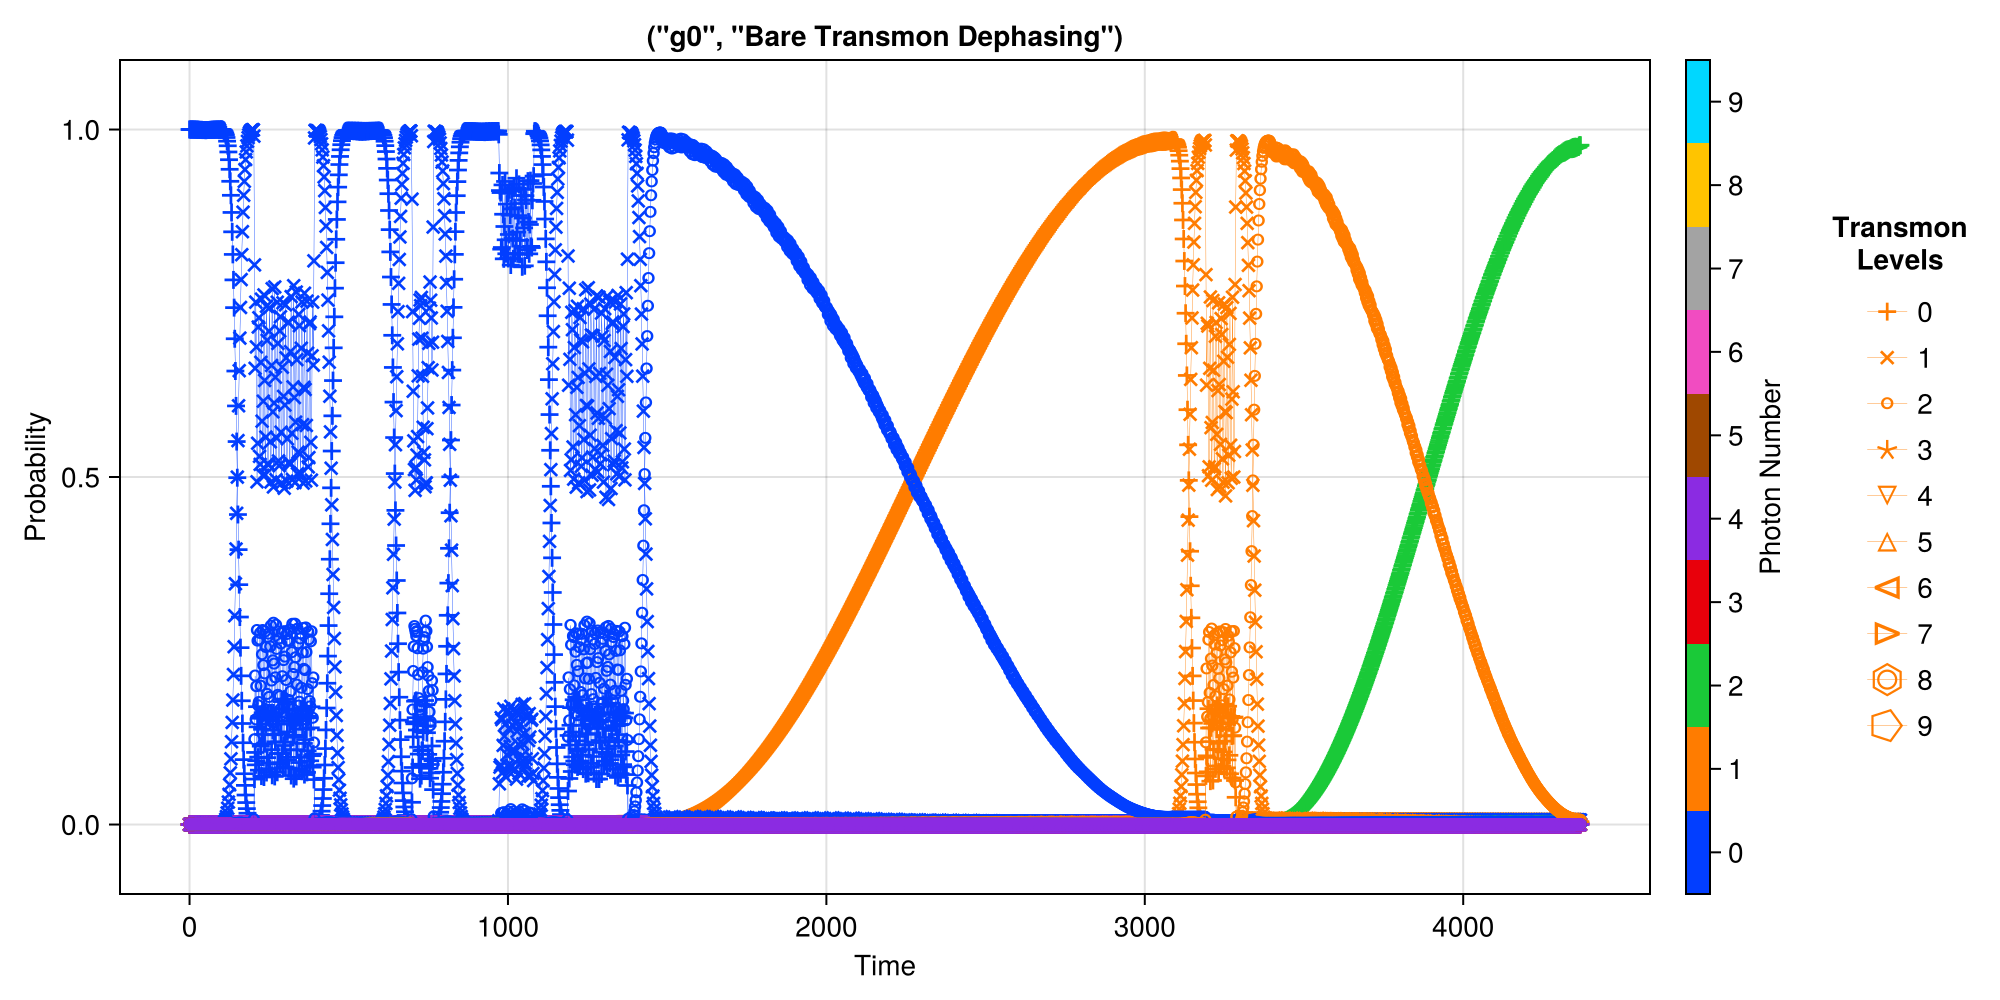

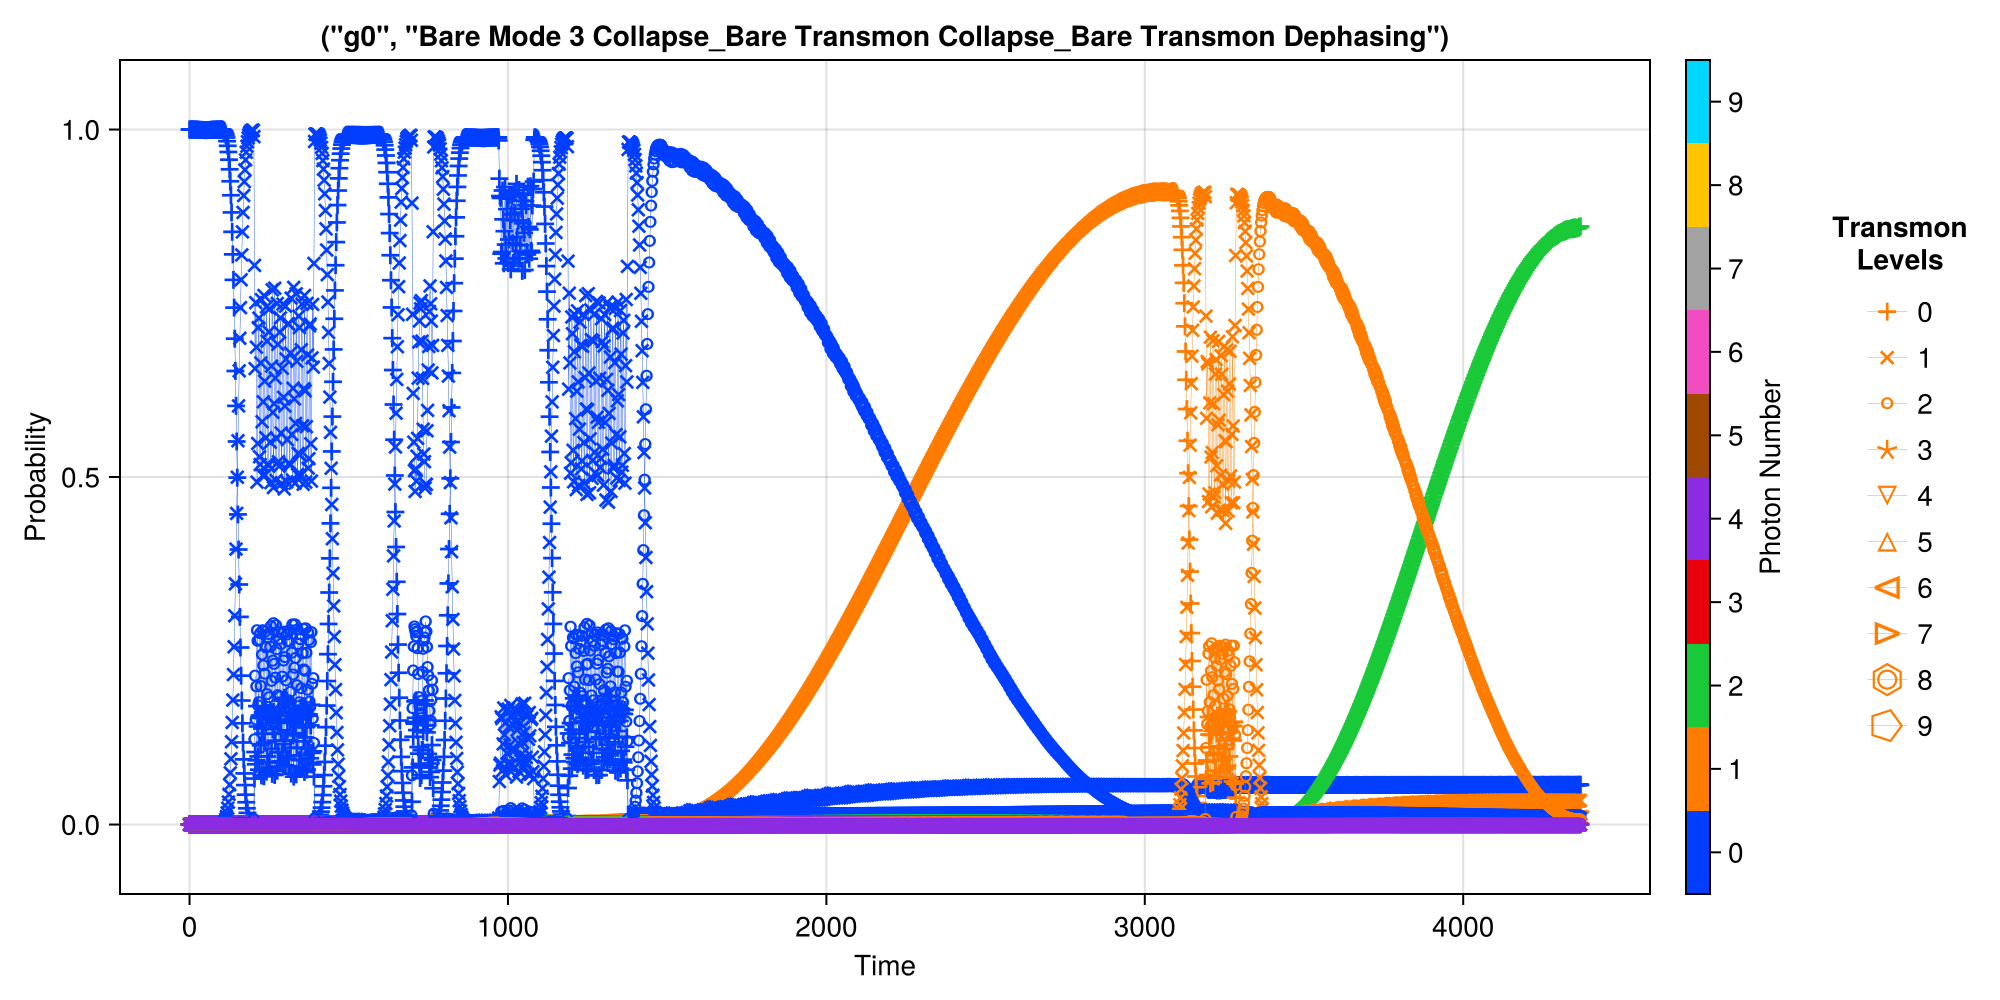

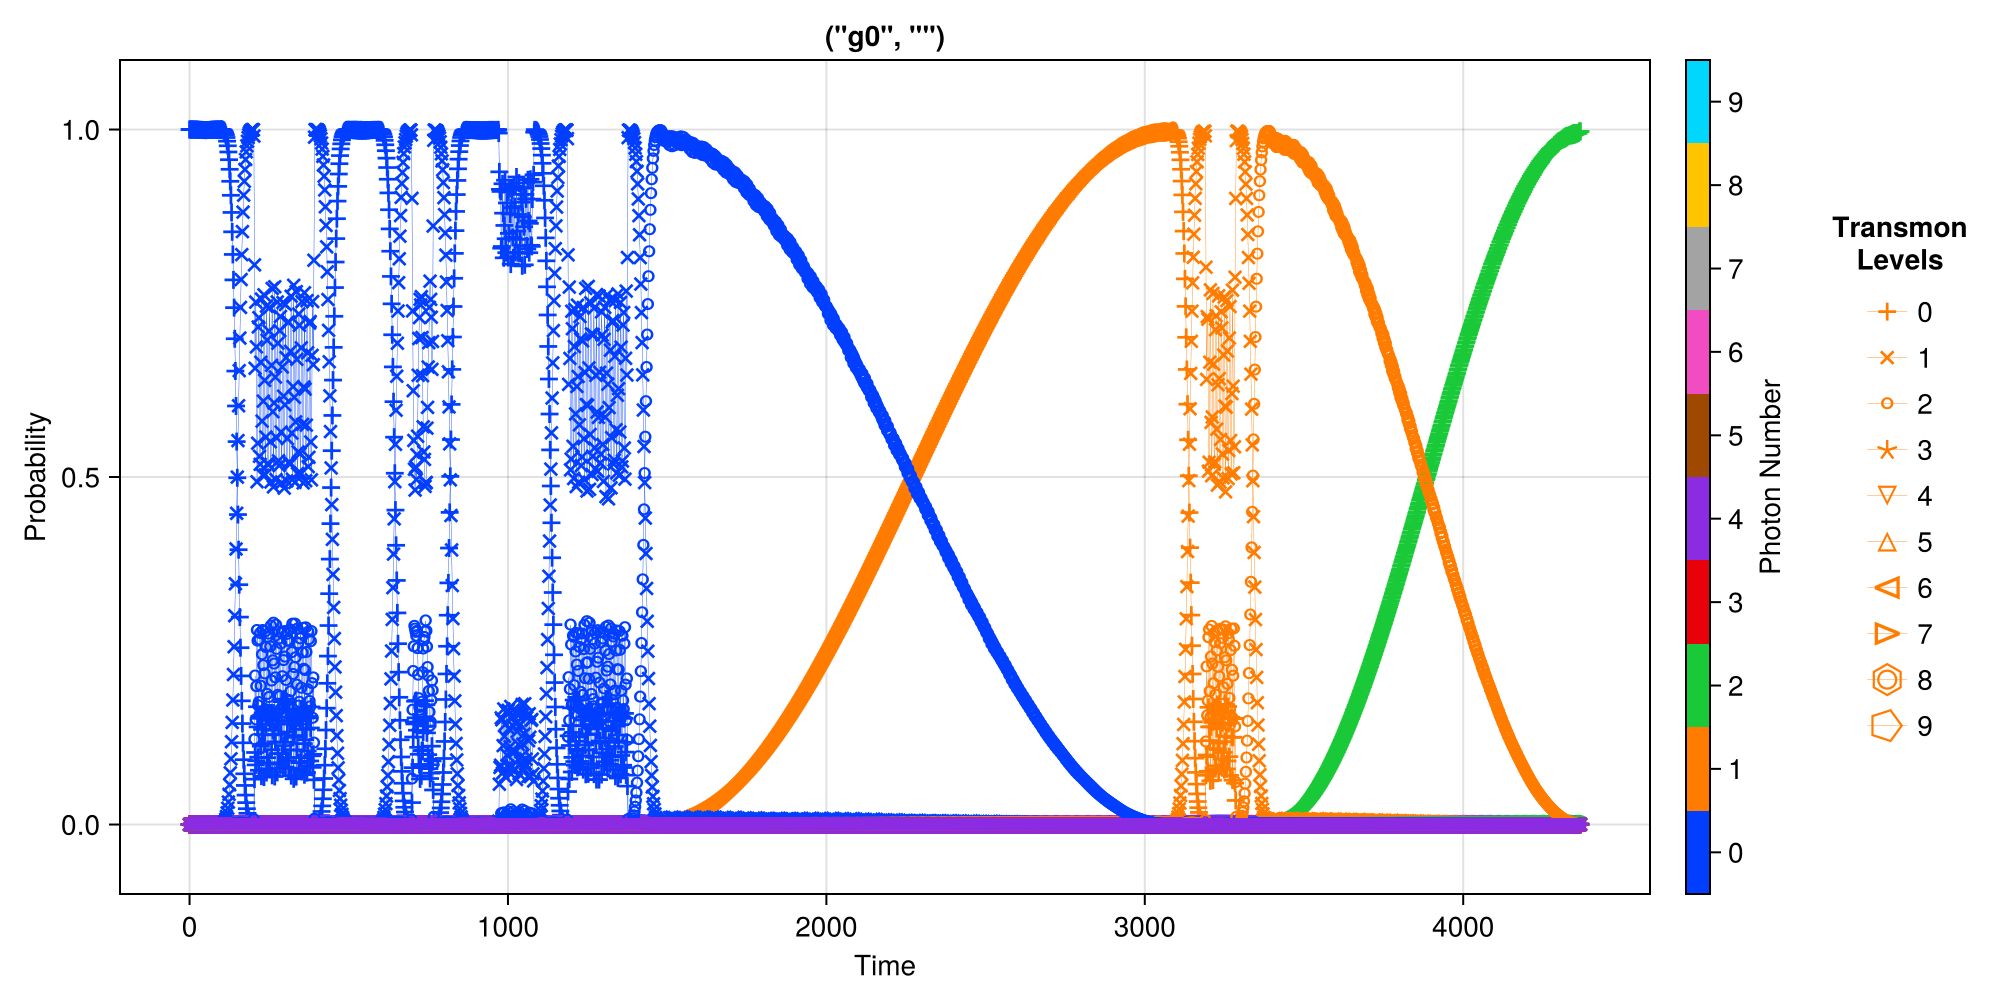

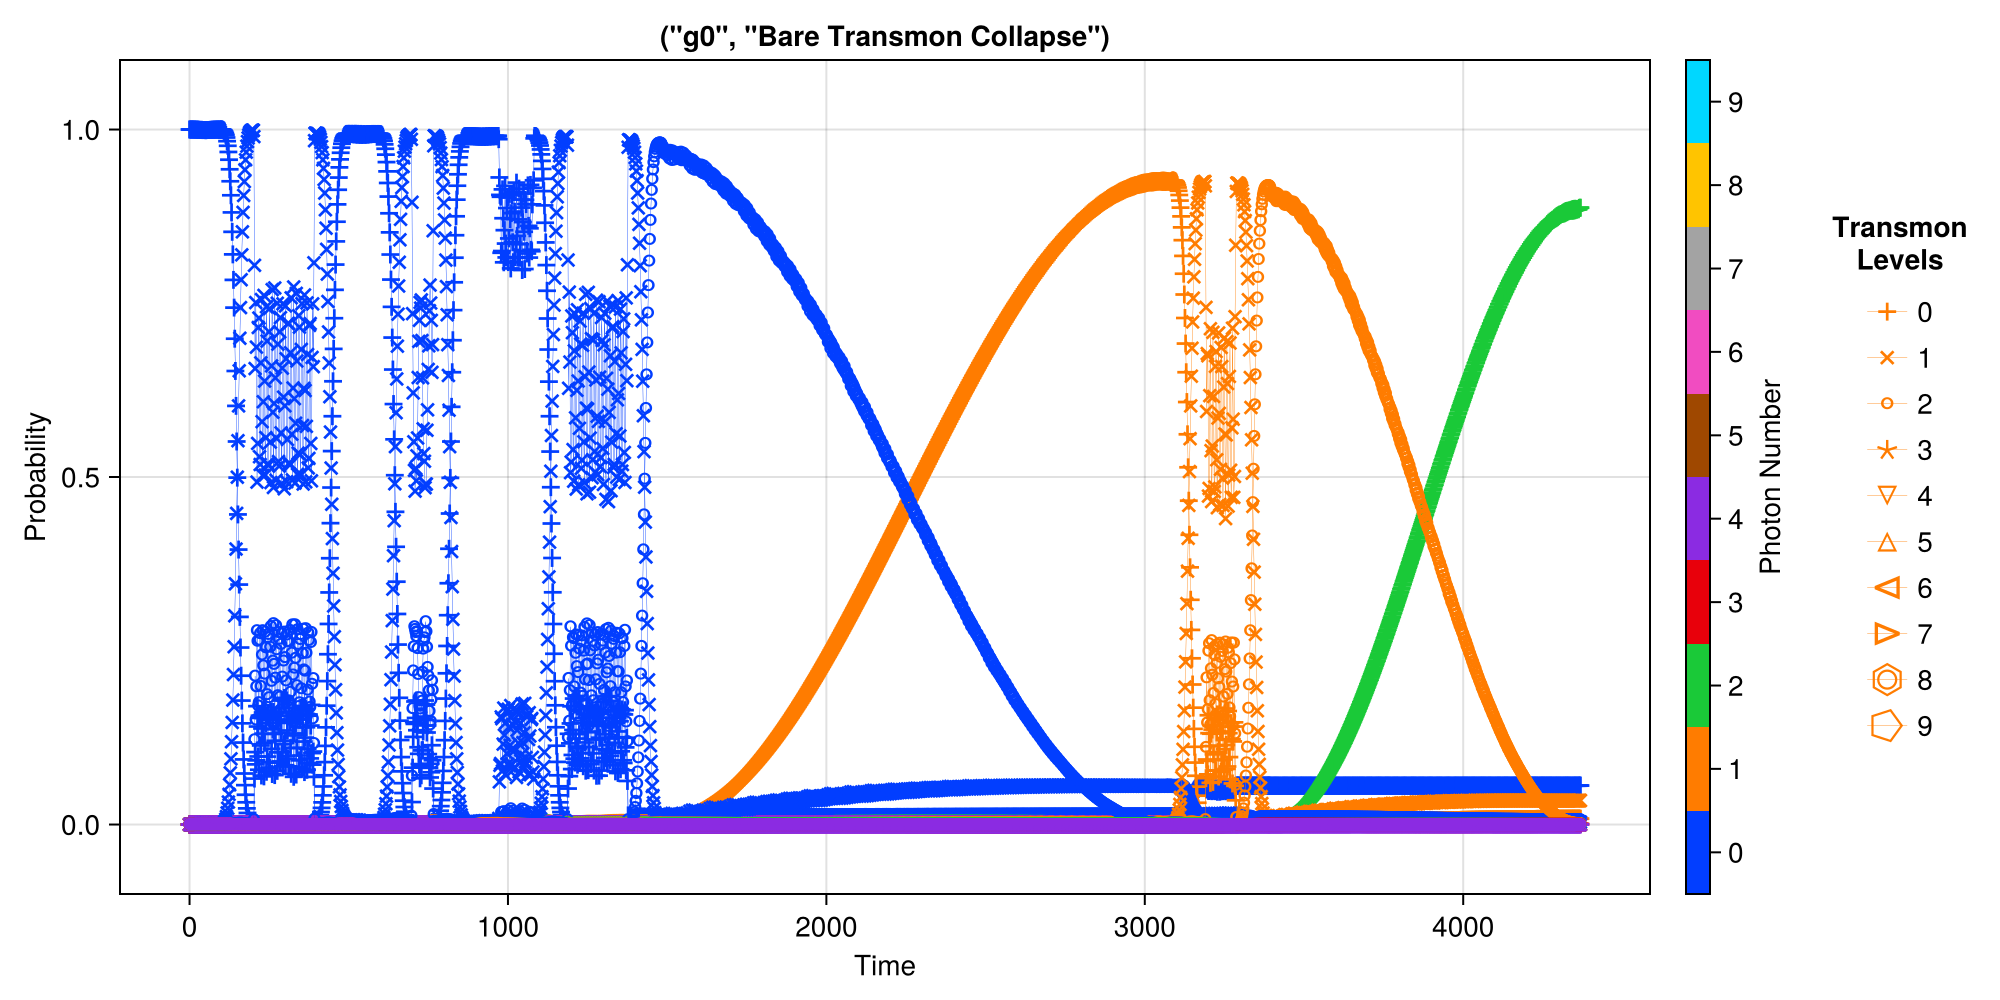

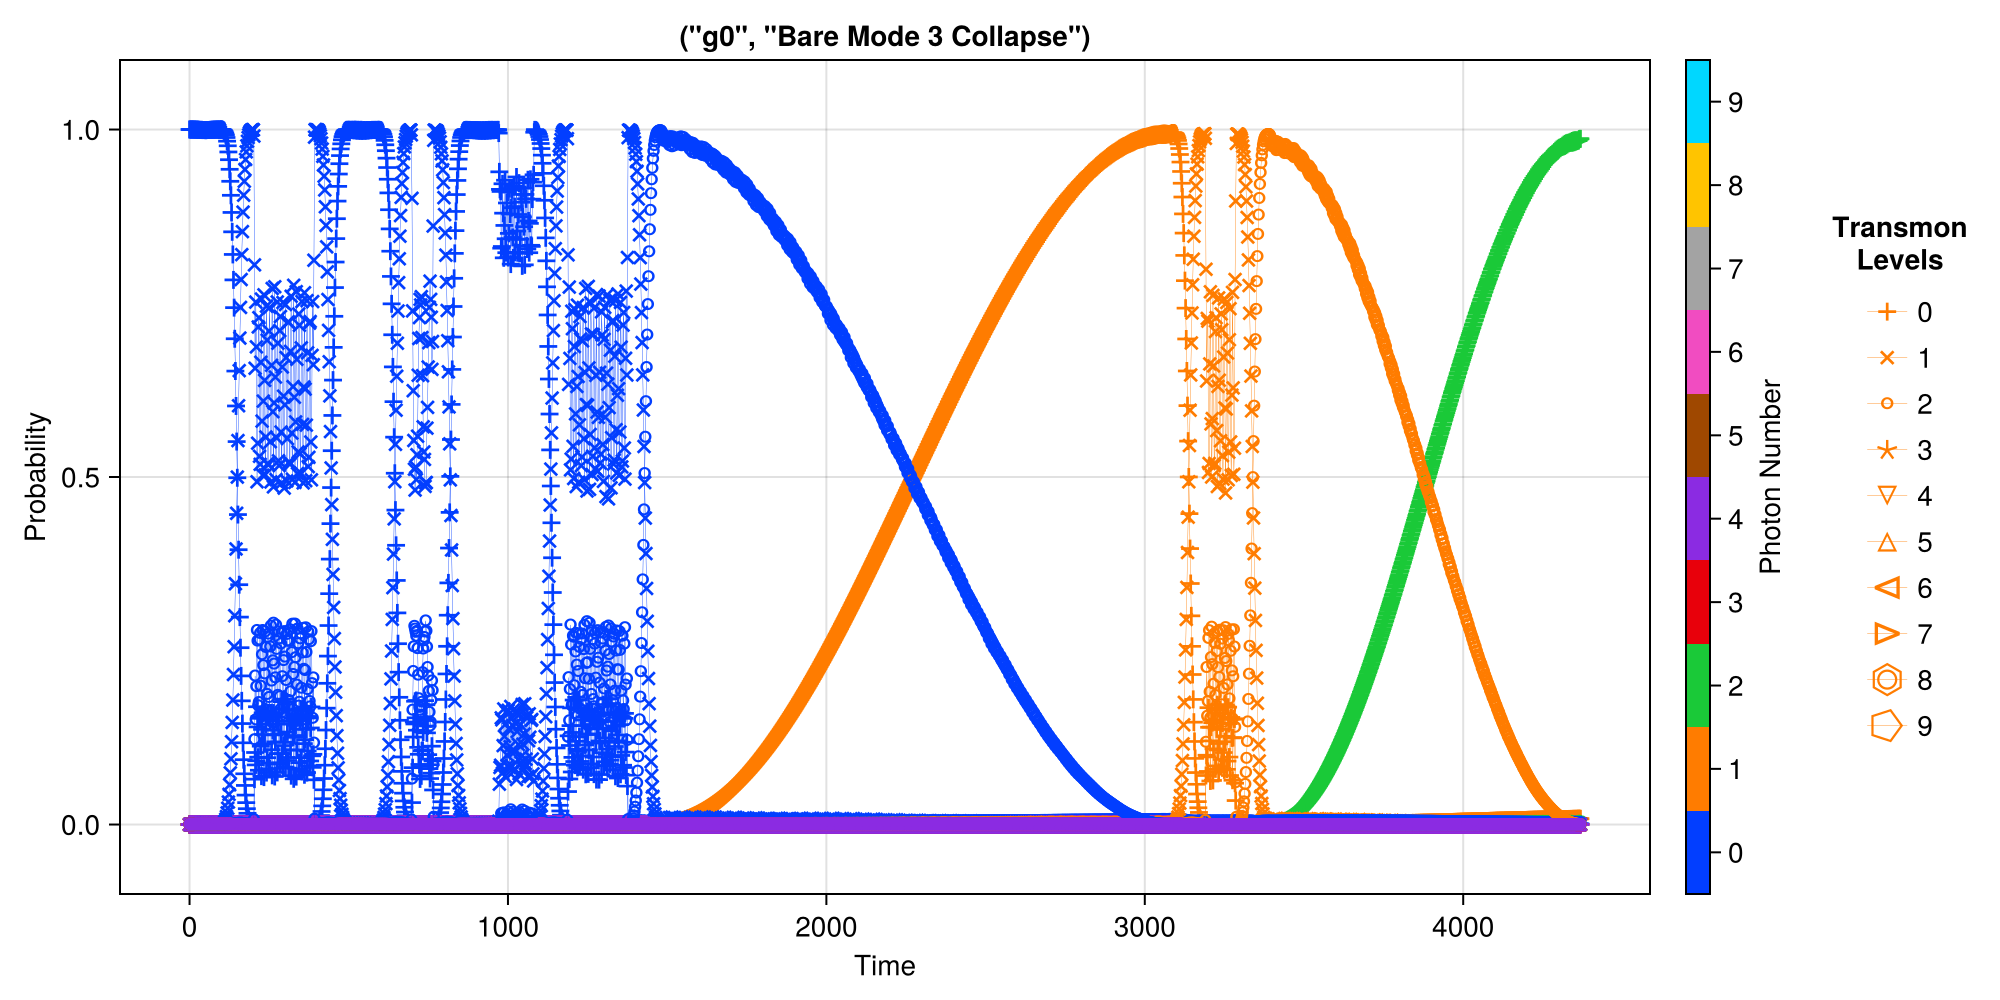

In [419]:
for key in keys(Mode3ErrorBudgetBare)
    Axis_kwargs = Dict{Any, Any}("title" => string(key))
    SC.Dynamics.PlotSingleModeEvolution(Mode3, Mode3ErrorBudgetBare[key]["times"], Probabilities[key], Axis_kwargs = Axis_kwargs)
end

# Plots of Ramp times and shapes

In [332]:
Mode3.Stuff["op_drive_params"]#["f0g1_SS_10.0"]

Dict{String, Any} with 60 entries:
  "q_ef_3"               => Dict{String, Any}("pulse_time"=>100, "Envelope Args…
  "f0g1_SS_7.5_chirped"  => Dict{String, Any}("pulse_time"=>191.728, "Envelope …
  "f0g1_G_2.5_chirped"   => Dict{String, Any}("pulse_time"=>184.951, "Envelope …
  "f0g1_G_40.0"          => Dict{String, Any}("pulse_time"=>250.398, "Envelope …
  "f0g1_SS_10.0_chirped" => Dict{String, Any}("pulse_time"=>185.898, "Envelope …
  "q_ef_0"               => Dict{String, Any}("pulse_time"=>100, "Envelope Args…
  "f0g1_SS_30.0"         => Dict{String, Any}("pulse_time"=>226.584, "Envelope …
  "f0g1_G_30.0_chirped"  => Dict{String, Any}("pulse_time"=>240, "Envelope Args…
  "q_ge_0"               => Dict{String, Any}("pulse_time"=>100, "Envelope Args…
  "f0g1_SS_5.0_chirped"  => Dict{String, Any}("pulse_time"=>190, "Envelope Args…
  "f0g1_G_10.0_chirped"  => Dict{String, Any}("pulse_time"=>182.305, "Envelope …
  "f0g1_G_30.0"          => Dict{String, Any}("pulse_time"=>233.004, "Enve

In [371]:
Ramp_Times = [2.5, 5, 7.5, 10, 20, 40, 60]
envelopes = ["Sine_Squared_Ramp", "Gaussian_Ramp"]
chirped = [true, false]

res = Dict{Any, Any}()

for envelope in envelopes
    for rt in Ramp_Times
        for chirp in chirped
            drive_name = ""
            if envelope == "Sine_Squared_Ramp"
                drive_name = "f0g1_SS_"*string(rt)
            end
            if envelope == "Gaussian_Ramp"
                drive_name = "f0g1_G_"*string(rt)
            end

            if chirp
                drive_name = drive_name*"_chirped"
            end

            if drive_name in keys(Mode3.Stuff["op_drive_params"])
                res[drive_name] = Mode3.Stuff["op_drive_params"][drive_name]["accuracy"]
            end
        end
    end
end

In [377]:
for key in keys(res)
    println(key)
end

f0g1_SS_7.5_chirped
f0g1_G_20.0
f0g1_G_2.5
f0g1_SS_2.5_chirped
f0g1_SS_40.0
f0g1_G_7.5_chirped
f0g1_SS_40.0_chirped
f0g1_SS_7.5
f0g1_SS_10.0
f0g1_G_5.0
f0g1_SS_60.0
f0g1_G_20.0_chirped
f0g1_G_2.5_chirped
f0g1_G_40.0_chirped
f0g1_G_10.0
f0g1_SS_2.5
f0g1_G_40.0
f0g1_SS_10.0_chirped
f0g1_G_60.0
f0g1_G_7.5
f0g1_G_10.0_chirped
f0g1_SS_5.0_chirped
f0g1_SS_20.0_chirped
f0g1_SS_60.0_chirped
f0g1_SS_20.0
f0g1_G_5.0_chirped
f0g1_G_60.0_chirped
f0g1_SS_5.0


In [382]:
SS = []
SS_x = []
SS_chirp = []
SS_chirp_x = []

G = []
G_x = []
G_chirp = []
G_chirp_x = []

for key in keys(res)
    key_split = split(key, "_")
    if length(key_split) == 4
        if key_split[2] == "SS"
            push!(SS_chirp, res[key])
            push!(SS_chirp_x, Meta.parse(key_split[3]))
        end
        if key_split[2] == "G"
            push!(G_chirp, res[key])
            push!(G_chirp_x, Meta.parse(key_split[3]))
        end
    else
        if key_split[2] == "SS"
            push!(SS, res[key])
            push!(SS_x, Meta.parse(key_split[3]))
        end
        if key_split[2] == "G"
            push!(G, res[key])
            push!(G_x, Meta.parse(key_split[3]))
        end
    end
end


In [383]:
permvec = sortperm(SS_x)
SS = SS[permvec]
SS_x = sort(SS_x)

permvec = sortperm(SS_chirp_x)
SS_chirp = SS_chirp[permvec]
SS_chirp_x = sort(SS_chirp_x)

permvec = sortperm(G_x)
G = G[permvec]
G_x = sort(G_x)

permvec = sortperm(G_chirp_x)
G_chirp = G_chirp[permvec]
G_chirp_x = sort(G_chirp_x);

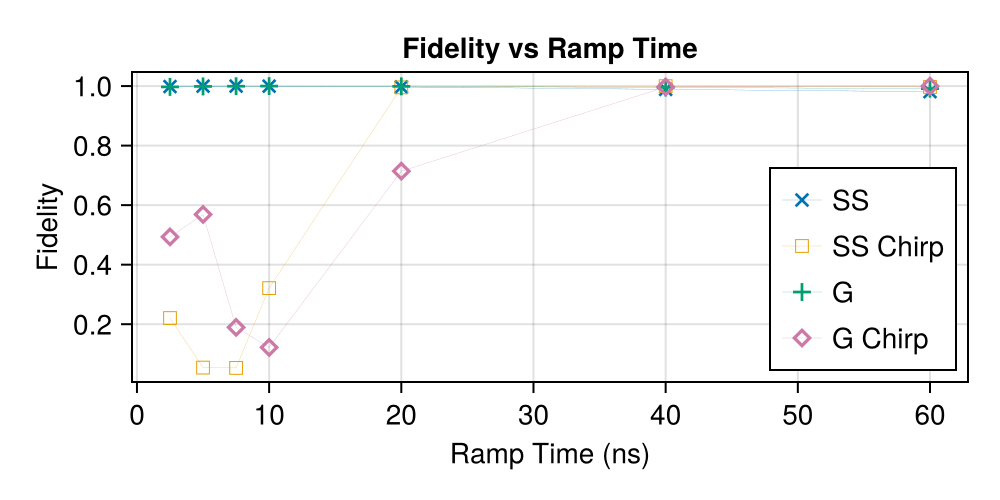

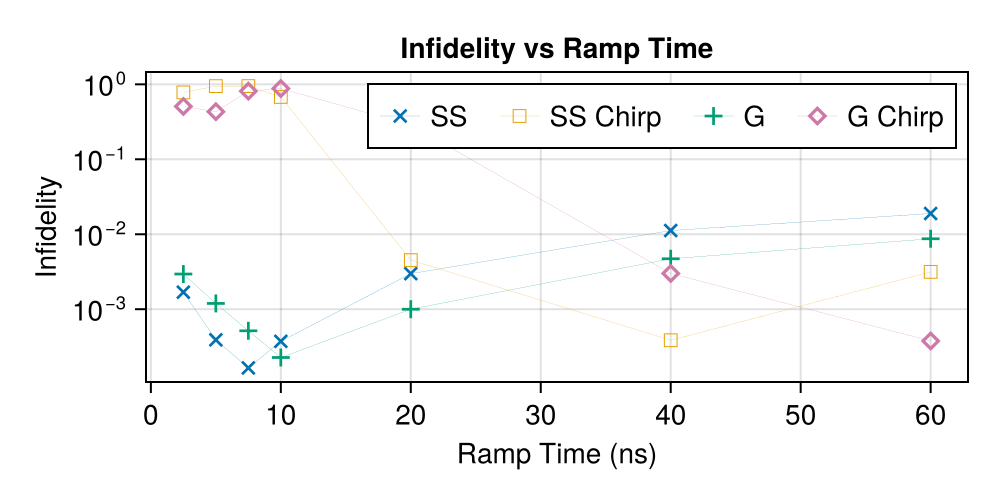

CairoMakie.Screen{IMAGE}


In [409]:
f = cm.Figure(size = (500, 250), px_per_unit = 8)
ax = cm.Axis(f[1,1], title = "Fidelity vs Ramp Time", xlabel = "Ramp Time (ns)", ylabel = "Fidelity")

cm.scatterlines!(ax, SS_x, SS, marker = '×', label = "SS", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, SS_chirp_x, SS_chirp, marker = '□', label = "SS Chirp", linewidth = 0.1)
cm.scatterlines!(ax, G_x, G, marker = '+', label = "G", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, G_chirp_x, G_chirp, marker = '⋄', markersize = 20, label = "G Chirp", linewidth = 0.1)
cm.axislegend(ax, position = :rb)

cm.display(f)


 
f = cm.Figure(size = (500, 250), px_per_unit = 8)
ax = cm.Axis(f[1,1], yscale = cm.log10, title = "Infidelity vs Ramp Time", xlabel = "Ramp Time (ns)", ylabel = "Infidelity")

cm.scatterlines!(ax, SS_x, -(SS.-1), marker = '×', label = "SS", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, SS_chirp_x, -(SS_chirp.-1), marker = '□', label = "SS Chirp", linewidth = 0.1)
cm.scatterlines!(ax, G_x, -(G.-1), marker = '+', label = "G", linewidth = 0.1, markersize = 20)
cm.scatterlines!(ax, G_chirp_x, -(G_chirp.-1), marker = '⋄', markersize = 20, label = "G Chirp", linewidth = 0.1)
cm.axislegend(ax, position = :rt, orientation = :horizontal)

cm.display(f)


